## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_pd = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_pd = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_table = pd.merge(clinical_trial_pd, mouse_data_pd, on="Mouse ID")
# Display the data table for preview
merge_table



#........
# comments included in original code
## my comments 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


## Summary statistics

#### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
new_table = merge_table[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]

groupby_drug = new_table.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame
print(type(groupby_drug))
# Preview DataFrame
groupby_drug_mean = groupby_drug.mean()
groupby_drug_mean = groupby_drug_mean.reset_index()

#this is the table converted to a dataframe.
#with index reset
groupby_drug_mean

##groupby_drug_mean

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
groupby_drug_sem = groupby_drug.sem()

# Convert to DataFrame
groupby_drug_sem = groupby_drug_sem.reset_index()
groupby_drug_sem
print(type(groupby_drug_sem))

# Preview DataFrame
groupby_drug_sem.head()

##groupby_drug_sem
##groupby_drug_mean


<class 'pandas.core.frame.DataFrame'>


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames #munging
drug_munging_sem = groupby_drug_sem.pivot(index='Timepoint', columns= 'Drug', values= 'Tumor Volume (mm3)')


# Preview that Reformatting worked
drug_munging_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [7]:
##reformat data frame 
drug_munging_mean = groupby_drug_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

##Check reformat output
drug_munging_mean


## we now have the tables:

## drug_munging_sem
## drug_munging_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [8]:
## consider the following function:

def drawing(data, sem):
    col_names = list(data.columns)
    for x in range(len(col_names)):
        values = data.iloc[:, x]
        plt.errorbar(values.index, values, yerr = sem.iloc[:, x], label=col_names[x], marker ="o", linewidth=0.7, markersize=3)
        plt.legend()
        

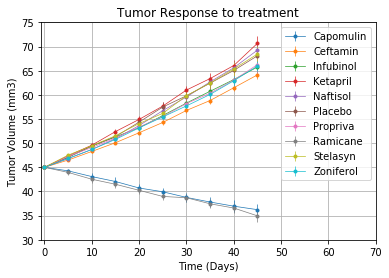

In [9]:
# Generate the Plot (with Error Bars)
#drawing is defined above as a function of data and sem.
drawing(drug_munging_mean, drug_munging_sem)

## drug_munging_sem
## drug_munging_mean

plt.title("Tumor Response to treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(list(drug_munging_mean.columns), loc="best")
plt.grid()

plt.xlim(-0.75, 70)
plt.ylim(30, 75)


# Save the Figure
plt.savefig("treatment.png")


In [10]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_temp_merge = merge_table[['Drug', 'Timepoint', 'Metastatic Sites']]
meta_groupby = meta_temp_merge.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame
meta_mean = meta_groupby.mean()
meta_mean = meta_mean.reset_index()

# Preview DataFrame

meta_mean

## "meta_mean" is representative of the table drawn from the original merge table joined on the Drug
## Timepoint and Metastatic variables from our data. This is a dataframe constructed as such.


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_se = meta_groupby.sem()

# Convert to DataFrame

meta_se = meta_se.reset_index()

# Preview DataFrame

meta_se.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [13]:
## data mung to reformat SE dataframe.

meta_se_mung = meta_se.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
meta_se_mung

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [14]:
# Minor Data Munging to Re-Format the Data Frames

meta_mean_mung = meta_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')


# Preview that Reformatting worked

meta_mean_mung

## utilizing meta_mean
## 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


<function matplotlib.pyplot.show(*args, **kw)>

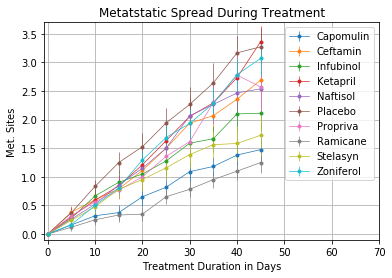

In [15]:
# Generate the Plot (with Error Bars)

drawing(meta_mean_mung, meta_se_mung)


plt.title("Metatstatic Spread During Treatment")
plt.xlabel("Treatment Duration in Days")
plt.ylabel("Met. Sites")
plt.legend(list(meta_mean_mung.columns), loc="best")
plt.grid()

## range and limit of graph

plt.xlim(-0.75, 70)
plt.ylim(-0.1, 3.7)

# Save the Figure
plt.savefig("spread.png")


# Show the Figure
plt.show


In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

merge_table_temp = merge_table[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
drug = merge_table_temp.groupby(['Drug', 'Timepoint'])


# Convert to DataFrame

drug_count = drug.count()
drug_count = drug_count.reset_index()

# Preview DataFrame

drug_count = drug_count.rename(columns={"Tumor Volume (mm3)": "Mouse Count"})
drug_count.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Minor Data Munging to Re-Format the Data Frames

drug_c_m = drug_count.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview the Data Frame

drug_c_m


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


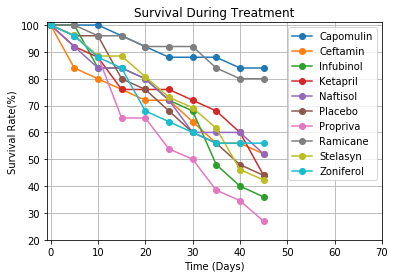

In [18]:
# Generate the Plot (Accounting for percentages)
drug_c_m.loc[5] = drug_c_m.loc[5]/drug_c_m.loc[0]*100
drug_c_m.loc[10] = drug_c_m.loc[10]/drug_c_m.loc[0]*100
drug_c_m.loc[15] = drug_c_m.loc[15]/drug_c_m.loc[0]*100
drug_c_m.loc[20] = drug_c_m.loc[20]/drug_c_m.loc[0]*100
drug_c_m.loc[25] = drug_c_m.loc[25]/drug_c_m.loc[0]*100
drug_c_m.loc[30] = drug_c_m.loc[30]/drug_c_m.loc[0]*100
drug_c_m.loc[35] = drug_c_m.loc[35]/drug_c_m.loc[0]*100
drug_c_m.loc[40] = drug_c_m.loc[40]/drug_c_m.loc[0]*100
drug_c_m.loc[45] = drug_c_m.loc[45]/drug_c_m.loc[0]*100
drug_c_m.loc[0] = drug_c_m.loc[0]/drug_c_m.loc[0]*100

survival_plot = plt.plot(drug_c_m, marker="o")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
plt.legend(list(drug_c_m), loc="best")
plt.grid()

plt.xlim(-0.75, 70)
plt.ylim(20, 101)


# Save the Figure
plt.savefig("survival.png")

# Show the Figure
plt.show()

In [19]:
# Calculate the percent changes for each drug
## the percent change for each drug is equal to the final value/ value at origin
percent_change = [(drug_c_m.loc[45]/drug_c_m.loc[0]-1)*100]

# Display the data to confirm
percent_change

[Drug
 Capomulin   -16.000000
 Ceftamin    -48.000000
 Infubinol   -64.000000
 Ketapril    -56.000000
 Naftisol    -48.000000
 Placebo     -56.000000
 Propriva    -73.076923
 Ramicane    -20.000000
 Stelasyn    -57.692308
 Zoniferol   -44.000000
 dtype: float64]

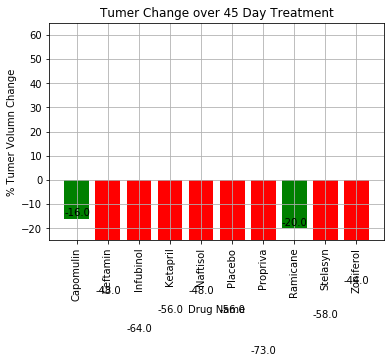

In [20]:
# Store all Relevant Percent Changes into a Tuple
percent_change[0] = percent_change[0].round()
percent_change_tuple = (percent_change[0])

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 
percent_change_name = percent_change_tuple.index
percent_change_name

x_axis = np.arange(len(percent_change_tuple))
tick_locations = [value for value in x_axis]

fig, ax = plt.subplots()
ax.bar(x_axis, percent_change_tuple, color=['green', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'red', 'red'])

plt.xticks(tick_locations, percent_change_name, rotation="vertical")

plt.title("Tumer Change over 45 Day Treatment")
plt.xlabel("Drug Name")
plt.ylabel("% Tumer Volumn Change")
plt.grid()
plt.ylim(-25, 65)
# Use functions to label the percentages of changes
for i, v in enumerate(percent_change_tuple):
    plt.text(x_axis[i] - 0.4, v + 1, str(v))

# Call functions to implement the function calls


# Save the Figure
plt.savefig("change.png")

# Show the Figure
fig.show()
